# Regressão 01 - tarefa 03 - transformações em X e Y

Carregue os pacotes necessários e a base de gorjetas.

### I. Modelo no valor da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo em ```tip```, explicada por ```sex, smoker, diner e net_bill```.  
2. Remova as variáveis não significantes.  
3. observe o gráfico de resíduos em função de ```net_bill```  
4. teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.

In [81]:
#importando bibliotecas

import pandas as pd
import seaborn as sns
from seaborn import load_dataset
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import patsy
import statsmodels.api as sm
import statsmodels.formula.api as smf


In [82]:
#carregando a base de dados tips
tips = sns.load_dataset("tips")
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips['net_bill'] = tips['total_bill'] - tips['tip']
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98


In [83]:
#criando um dummy somente para a variavel dinner e adicionando no dataframe

tips_scat = pd.get_dummies(tips['time'])
tips_scat
tips['Dinner'] = tips_scat['Dinner']

In [84]:
#usando o patsy para criar as matrizes
y, X = patsy.dmatrices('tip ~ sex + smoker + Dinner + net_bill', tips)
X

DesignMatrix with shape (244, 5)
  Intercept  sex[T.Female]  smoker[T.No]  Dinner[T.True]  net_bill
          1              1             1               1     15.98
          1              0             1               1      8.68
          1              0             1               1     17.51
          1              0             1               1     20.37
          1              1             1               1     20.98
          1              0             1               1     20.58
          1              0             1               1      6.77
          1              0             1               1     23.76
          1              0             1               1     13.08
          1              0             1               1     11.55
          1              0             1               1      8.56
          1              1             1               1     30.26
          1              0             1               1     13.85
          1              0   

In [85]:
#Apenas a variavel net_bill se apresentou significante para o modelo. Entao será removido as demais variaveis.

y, X = patsy.dmatrices('tip ~ net_bill', tips)
X

#criando e treinando o modelo

modelo = sm.OLS(y,X).fit()
print(modelo.summary())

#residuos
tips['res'] = modelo.resid

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.330
Method:                 Least Squares   F-statistic:                     120.6
Date:                Fri, 24 May 2024   Prob (F-statistic):           5.02e-23
Time:                        13:36:29   Log-Likelihood:                -375.63
No. Observations:                 244   AIC:                             755.3
Df Residuals:                     242   BIC:                             762.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.3307      0.168      7.907      0.0

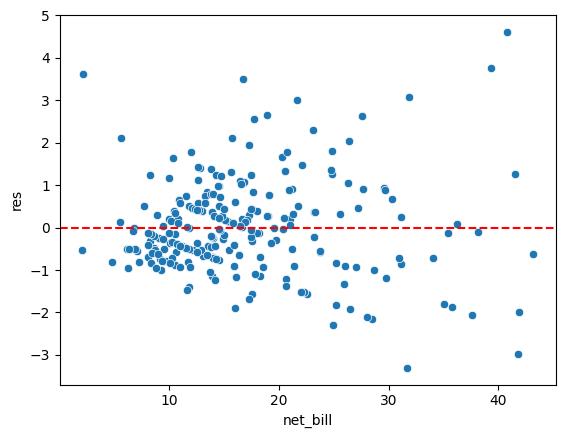

In [86]:
#plotando o grafico de residuos em funçao do net_bill

sns.scatterplot(x = 'net_bill', y = 'res', data = tips)
plt.axhline(y=0, color='r', linestyle='--')

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.294
Model:                            OLS   Adj. R-squared:                  0.292
Method:                 Least Squares   F-statistic:                     101.0
Date:                Fri, 24 May 2024   Prob (F-statistic):           4.40e-20
Time:                        13:36:34   Log-Likelihood:                -382.40
No. Observations:                 244   AIC:                             768.8
Df Residuals:                     242   BIC:                             775.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -1.2575      0.430  

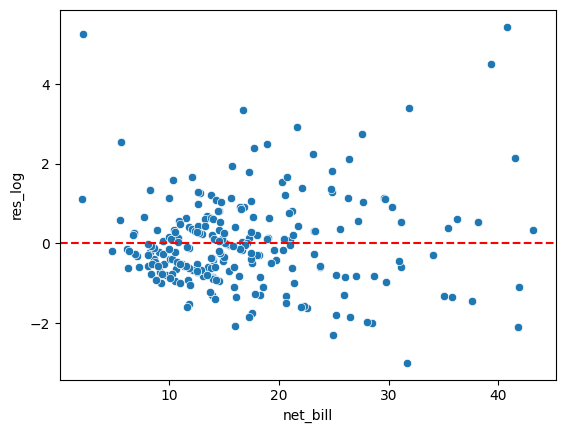

In [87]:
y, X = patsy.dmatrices('tip ~ np.log(net_bill)', tips) #transformando o net_bill em log
modelo1 = sm.OLS(y,X).fit()
tips['res_log'] = modelo1.resid
print(modelo1.summary())

#plotando o grafico de residuos em funçao do net_bill

sns.scatterplot(x = 'net_bill', y = 'res_log', data = tips)
plt.axhline(y=0, color='r', linestyle='--')

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.301
Model:                            OLS   Adj. R-squared:                  0.298
Method:                 Least Squares   F-statistic:                     104.1
Date:                Fri, 24 May 2024   Prob (F-statistic):           1.47e-20
Time:                        13:36:38   Log-Likelihood:                -381.31
No. Observations:                 244   AIC:                             766.6
Df Residuals:                     242   BIC:                             773.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 2.25

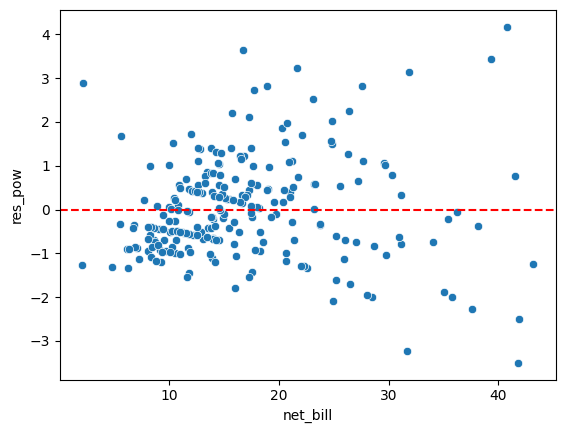

In [88]:
y, X = patsy.dmatrices('tip ~ np.power(net_bill,2)', tips) #transformando o net_bill em log
modelo2 = sm.OLS(y,X).fit()
tips['res_pow'] = modelo2.resid
print(modelo2.summary())
#plotando o grafico de residuos em funçao do net_bill

sns.scatterplot(x = 'net_bill', y = 'res_pow', data = tips)
plt.axhline(y=0, color='r', linestyle='--')

O melhor modelo permaneceu o modelo inicial com r-quadrado de .333

### II. Modelo no valor do percentual da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo no log de ```tip```, explicado por ```sex, smoker, diner e net_bill```.
2. Remova as variáveis não significantes.
3. Observe o gráfico de resíduos em função de ```net_bill```
4. Teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.
5. Do modelo final deste item, calcule o $R^2$ na escala de ```tip``` (sem o log). Compare com o modelo do item 1. Qual tem melhor coeficiente de determinação?

In [89]:
# em relaçao ao pontos de 1 a 4 são exatamente iguais aos passos feitos no primeiro modelo. Sendo assim vou apenas calcular o r2.
# O melhor modelo apresentado no item 1 foi o modelo de tip ~ net_bill

tips['res'] = modelo.fittedvalues
r = tips[['net_bill','tip']].corr().iloc[0,1]
r**2

0.33254073123237093

Em relaçao ao r_quadrado, como as duas analises sao iguais, o melhor modelo la quanto aqui tiveram o mesmo r-quadrado, diferenciando apenas que no primeiro caso estava com as casas decimais restritas em 3 unidades .333 e o calculo atual foi .33254.

### III. Previsão de renda

Vamos trabalhar a base que você vai usar no projeto do final deste ciclo.

Carregue a base ```previsao_de_renda.csv```.

|variavel|descrição|
|-|-|
|data_ref                | Data de referência de coleta das variáveis |
|index                   | Código de identificação do cliente|
|sexo                    | Sexo do cliente|
|posse_de_veiculo        | Indica se o cliente possui veículo|
|posse_de_imovel         | Indica se o cliente possui imóvel|
|qtd_filhos              | Quantidade de filhos do cliente|
|tipo_renda              | Tipo de renda do cliente|
|educacao                | Grau de instrução do cliente|
|estado_civil            | Estado civil do cliente|
|tipo_residencia         | Tipo de residência do cliente (própria, alugada etc)|
|idade                   | Idade do cliente|
|tempo_emprego           | Tempo no emprego atual|
|qt_pessoas_residencia   | Quantidade de pessoas que moram na residência|
|renda                   | Renda em reais|

1. Ajuste um modelo de regressão linear simples para explicar ```renda``` como variável resposta, por ```tempo_emprego``` como variável explicativa. Observe que há muitas observações nessa tabela. Utilize os recursos que achar necessário.
2. Faça uma análise de resíduos. Com os recursos vistos neste módulo, como você melhoraria esta regressão?
3. Ajuste um modelo de regressão linear múltipla para explicar ```renda``` (ou uma transformação de ```renda```) de acordo com as demais variáveis.
4. Remova as variáveis não significantes e ajuste novamente o modelo. Interprete os parâmetros
5. Faça uma análise de resíduos. Avalie a qualidade do ajuste.

In [90]:
#importando os dados

df = pd.read_csv('/kaggle/input/previsao-de-renda/previsao_de_renda.csv')
df.head()

,Unnamed: 0,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,0,2015-01-01,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,1,2015-01-01,12830,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2,2015-01-01,2885,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,3,2015-01-01,16168,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,4,2015-01-01,12438,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37


In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             15000 non-null  int64  
 1   data_ref               15000 non-null  object 
 2   index                  15000 non-null  int64  
 3   sexo                   15000 non-null  object 
 4   posse_de_veiculo       15000 non-null  bool   
 5   posse_de_imovel        15000 non-null  bool   
 6   qtd_filhos             15000 non-null  int64  
 7   tipo_renda             15000 non-null  object 
 8   educacao               15000 non-null  object 
 9   estado_civil           15000 non-null  object 
 10  tipo_residencia        15000 non-null  object 
 11  idade                  15000 non-null  int64  
 12  tempo_emprego          12466 non-null  float64
 13  qt_pessoas_residencia  15000 non-null  float64
 14  mau                    15000 non-null  bool   
 15  re

In [93]:
#removendo valores faltantes
df = df.dropna()

In [94]:
# ajustando o modelo

reg = smf.ols('renda ~ tempo_emprego', data= df).fit()
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:                  renda   R-squared:                       0.155
Model:                            OLS   Adj. R-squared:                  0.155
Method:                 Least Squares   F-statistic:                     2294.
Date:                Fri, 24 May 2024   Prob (F-statistic):               0.00
Time:                        13:37:04   Log-Likelihood:            -1.2249e+05
No. Observations:               12466   AIC:                         2.450e+05
Df Residuals:                   12464   BIC:                         2.450e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      2653.9453     60.924     43.561

In [95]:
df['res'] = reg.resid

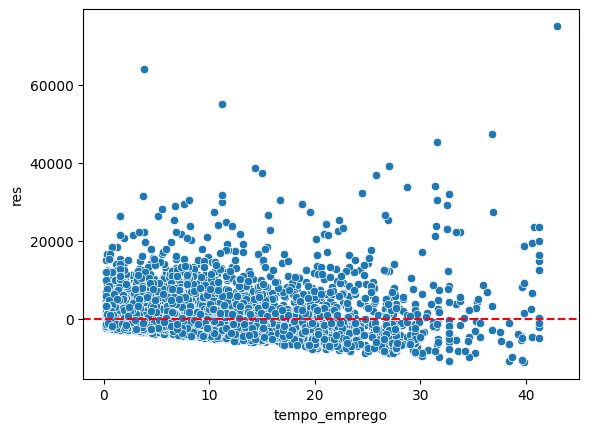

In [96]:
sns.scatterplot(x = 'tempo_emprego', y = 'res', data = df)
plt.axhline(y=0, color='r', linestyle='--')

                            OLS Regression Results                            
Dep. Variable:                  renda   R-squared:                       0.166
Model:                            OLS   Adj. R-squared:                  0.166
Method:                 Least Squares   F-statistic:                     2478.
Date:                Fri, 24 May 2024   Prob (F-statistic):               0.00
Time:                        13:37:16   Log-Likelihood:            -1.2241e+05
No. Observations:               12466   AIC:                         2.448e+05
Df Residuals:                   12464   BIC:                         2.448e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

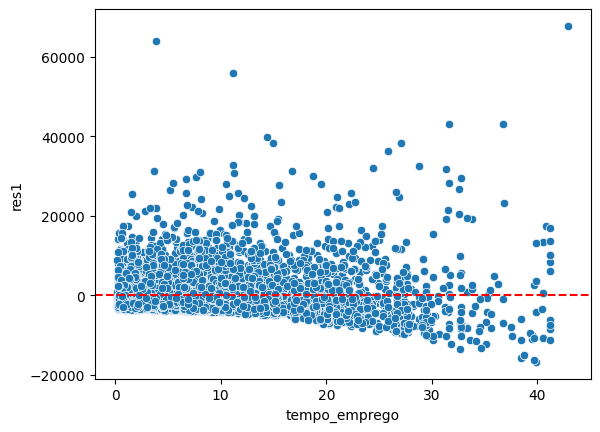

In [97]:
#analisando como melhorar o modelo
reg1 = smf.ols('renda ~ np.power(tempo_emprego,2)', data= df).fit()
print(reg1.summary())
df['res1'] = reg1.resid
sns.scatterplot(x = 'tempo_emprego', y = 'res1', data = df)
plt.axhline(y=0, color='r', linestyle='--')

O modelo inicial se apresentou ate bom graficamente, porem o segundo modelo com polinomio apresentou um melhor r2.

In [98]:
df['pred1']= reg.fittedvalues
df['pred'] = reg1.fittedvalues

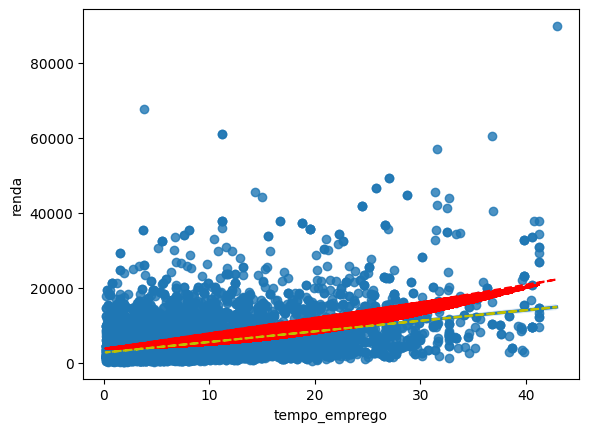

In [99]:
sns.regplot(y = 'renda', x = 'tempo_emprego', data = df)
plt.plot(df['tempo_emprego'], df['pred'], 'r--')
plt.plot(df['tempo_emprego'], df['pred1'], 'y--')

Colocando sobre o grafico o modelo sem ateraçoes apresentou uma linha de prediçao mais proxima, porem acredito que a linha vermelha referente ao segundo modelo explica melhor a tendendicia exponecial de quanto maior o tempo de emprego maior sera a renda. Como a base de dados possui alguns outliers pode estar afetando o modelo negativamente.

In [100]:
#usando o patsy para criar as matrizes
y, X = patsy.dmatrices('renda ~ tempo_emprego + posse_de_veiculo + posse_de_imovel', df)
X

DesignMatrix with shape (12466, 4)
  Intercept  posse_de_veiculo[T.True]  posse_de_imovel[T.True]  tempo_emprego
          1                         0                        1        3.57534
          1                         1                        1        0.86027
          1                         1                        1        8.06575
          1                         1                        0        1.20822
          1                         0                        0       13.87397
          1                         0                        1       15.56164
          1                         0                        1        5.04658
          1                         1                        1        1.59178
          1                         0                        0        3.43014
          1                         0                        1        7.21918
          1                         0                        1        5.63836
          1                  

In [101]:
#criando e treinando o modelo

modelo_df = sm.OLS(y,X).fit()
print(modelo_df.summary())

#residuos
df['res1'] = modelo_df.resid

                            OLS Regression Results                            
Dep. Variable:                  renda   R-squared:                       0.163
Model:                            OLS   Adj. R-squared:                  0.162
Method:                 Least Squares   F-statistic:                     807.2
Date:                Fri, 24 May 2024   Prob (F-statistic):               0.00
Time:                        13:37:38   Log-Likelihood:            -1.2244e+05
No. Observations:               12466   AIC:                         2.449e+05
Df Residuals:                   12462   BIC:                         2.449e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

**Foi removido a variavel 'educacao'que nao se mostrou significante para o modelo**

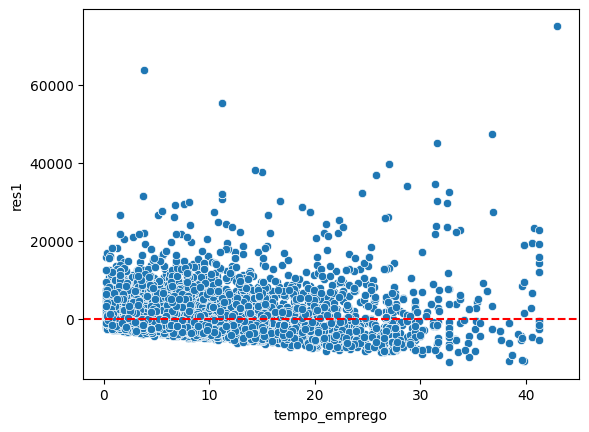

In [105]:
sns.scatterplot(x = 'tempo_emprego', y = 'res1', data = df)
plt.axhline(y=0, color='r', linestyle='--')

In [109]:
y, X = patsy.dmatrices('renda ~ np.power(tempo_emprego,2) + posse_de_veiculo + posse_de_imovel', df)
X

DesignMatrix with shape (12466, 4)
  Columns:
    ['Intercept',
     'posse_de_veiculo[T.True]',
     'posse_de_imovel[T.True]',
     'np.power(tempo_emprego, 2)']
  Terms:
    'Intercept' (column 0)
    'posse_de_veiculo' (column 1)
    'posse_de_imovel' (column 2)
    'np.power(tempo_emprego, 2)' (column 3)
  (to view full data, use np.asarray(this_obj))

In [110]:
#criando e treinando o modelo

modelo_df1 = sm.OLS(y,X).fit()
print(modelo_df1.summary())

#residuos
df['res2'] = modelo_df1.resid

                            OLS Regression Results                            
Dep. Variable:                  renda   R-squared:                       0.173
Model:                            OLS   Adj. R-squared:                  0.173
Method:                 Least Squares   F-statistic:                     871.4
Date:                Fri, 24 May 2024   Prob (F-statistic):               0.00
Time:                        13:45:04   Log-Likelihood:            -1.2236e+05
No. Observations:               12466   AIC:                         2.447e+05
Df Residuals:                   12462   BIC:                         2.447e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

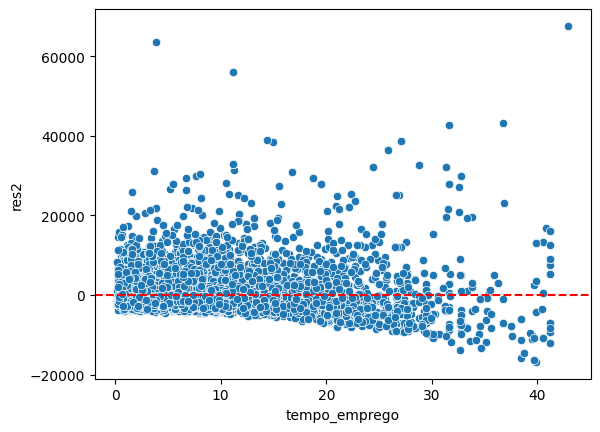

In [106]:
sns.scatterplot(x = 'tempo_emprego', y = 'res2', data = df)
plt.axhline(y=0, color='r', linestyle='--')

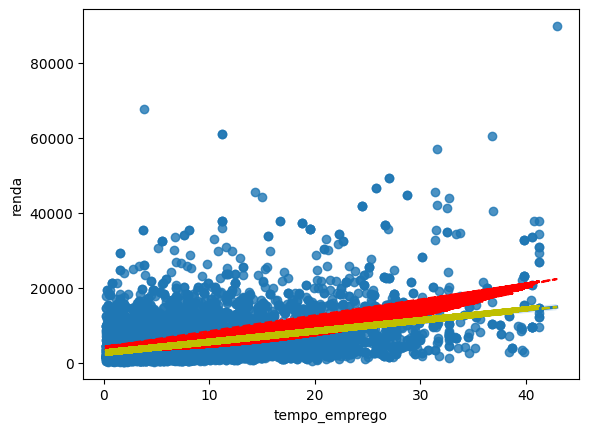

In [111]:
#avaliando a qualidade do ajuste

df['pred2']= modelo_df.fittedvalues
df['pred3']= modelo_df1.fittedvalues


sns.regplot(y = 'renda', x = 'tempo_emprego', data = df)
plt.plot(df['tempo_emprego'], df['pred3'], 'r--')
plt.plot(df['tempo_emprego'], df['pred2'], 'y--')

Ambos modelos com multiplas variaveis se apresentaram com uma prediçao melhor, alem de ter um r-2 superior tambem. Porem o melhor modelo que representa a tendencia melhor foi o modelo usando ( renda ~ np.power(tempo_emprego,2) + posse_de_veiculo + posse_de_imovel ) com um r-2 de 0.173.